# Q1

In [37]:
graph = {
    'A': ['B', 'C'],
    'B': ['D', 'E'],
    'C': ['F', 'G'],
    'D': ['H', 'I'],
    'E': ['J'],
    'F': [], 'G': [], 'H': [], 'I': [], 'J': []
}

In [38]:
# 깊이 우선 탐색(DFS) 함수 정의
def dfs(node, visited=None, path_trace=None):
    # 방문한 노드를 기록하는 리스트
    if visited is None:
        visited = []

    # 현재까지 탐색 경로를 저장
    if path_trace is None:
        path_trace = []

    # 현재 노드를 방문 처리
    visited.append(node)

    # 경로 추적을 위해 현재 노드를 경로에 추가
    path_trace.append(node)

    # 현재까지의 탐색 경로 출력
    print("→ 경로:", "->".join(path_trace))

    # 현재 노드에 연결된 모든 이웃 노드를 탐색
    for neighbor in sorted(graph[node]):
        if neighbor not in visited:           # 아직 방문하지 않은 경우에만
            dfs(neighbor, visited, path_trace)  # 재귀 탐색

    # 해당 노드에서의 탐색이 끝나면 경로에서 제거
    path_trace.pop()

# 시작 노드를 'A'로 설정하여 DFS 탐색 시작
dfs('A')

→ 경로: A
→ 경로: A->B
→ 경로: A->B->D
→ 경로: A->B->D->H
→ 경로: A->B->D->I
→ 경로: A->B->E
→ 경로: A->B->E->J
→ 경로: A->C
→ 경로: A->C->F
→ 경로: A->C->G


Answer:
A->B->D->H

설명: 
1. A로부터 시작한다. Visited과 path_trace에 A를 넣는다.
2. A의 자식 노드 중 먼저 B와 그 아래 노드들을 탐색한다.
3. Visited과 path_trace에 B를 추가한다.
4. 이와 같은 방식으로 B의 자식 노드들을 탐색한다. 끝에 다다르면 path_trace.pop을 통해 path_trace에서 노드를 빼서 뒤로 돌아간다.
5. if neighbor not in visited을 통해 방문한 노드는 방문하지 않도록 한다.
6. 이와 같은 방식으로 모든 경로를 탐색한다.

# Q2

In [34]:
graph = {
    'A': ['B', 'C'],
    'B': ['D', 'E'],
    'C': ['F', 'G'],
    'D': [], 'E': [], 'F': [], 'G': []
}

In [35]:
# 너비 우선 탐색 함수
def bfs(start):
    visited = []                 # 방문한 노드 기록
    queue = deque([start])       # 큐에 시작 노드 삽입
    #deque : collections 모듈에 있는 양방향 큐(Double-Ended Queue) 자료
    #queue:이후 탐색 대상이 담길 큐

    # queue가 빌 때까지 반복한다.
    while queue:
        node = queue.popleft()   # 큐에서 가장 먼저 들어온 노드를 꺼냄
        if node not in visited: # 방문하지 않은 것만 탐색.
            print(f"방문: {node}")
            visited.append(node) 
            # 알파벳 순으로 인접 노드를 큐에 추가
            queue.extend(sorted(graph[node]))
            print("큐 내용 (리스트 형태):", list(queue))

    return visited

# 실행
print("🔍 BFS 탐색 결과 (알파벳 우선순위 기준):")
result = bfs('A')
print("→ 순서:", result)

🔍 BFS 탐색 결과 (알파벳 우선순위 기준):
방문: A
큐 내용 (리스트 형태): ['B', 'C']
방문: B
큐 내용 (리스트 형태): ['C', 'D', 'E']
방문: C
큐 내용 (리스트 형태): ['D', 'E', 'F', 'G']
방문: D
큐 내용 (리스트 형태): ['E', 'F', 'G']
방문: E
큐 내용 (리스트 형태): ['F', 'G']
방문: F
큐 내용 (리스트 형태): ['G']
방문: G
큐 내용 (리스트 형태): []
→ 순서: ['A', 'B', 'C', 'D', 'E', 'F', 'G']


Answer: E

설명: 
1. A부터 시작하여 인접 노드들 먼저 탐색한다.
2. 탐색을 한 노드는 pop으로 queue에서 빼내고, 탐색한 노드와 이웃한 노드들을 queue에 추가한다.
3. While을 통해 queue의 가장 왼쪽에 있는 것들을 하나씩 탐색한다.
4. if node not in visited을 통해 탐색한 것은 다시 탐색하지 않도록 한다.

# Q3

✅ 최소 비용 신장 트리 간선 목록:
0 - 1, 비용: 1
1 - 2, 비용: 2
2 - 3, 비용: 3

🌟 총 비용: 6


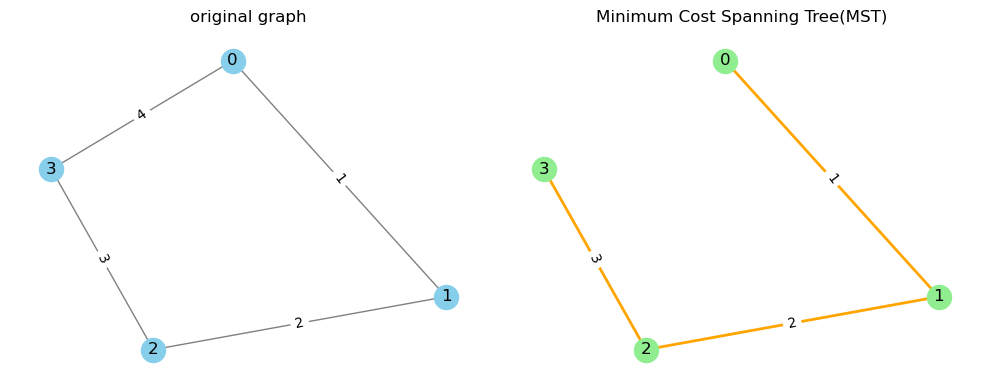

In [22]:
# networkx는 그래프를 생성하고 다루기 위한 라이브러리
import networkx as nx
# matplotlib는 그래프를 시각화하는 데 사용
import matplotlib.pyplot as plt

# 1. 그래프 정의 (가중치 포함)
G = nx.Graph()  # 무방향 그래프 객체 생성

# 간선 정의: (노드1, 노드2, 가중치) 형식의 튜플 리스트
edges = [
    (0, 1, 1),
    (1, 2, 2),
    (2, 3, 3),
    (3, 0, 4)
]

# 정의한 간선들을 그래프 G에 추가 (가중치 포함)
G.add_weighted_edges_from(edges)

# 2. Kruskal 알고리즘을 사용해 MST(최소 비용 신장 트리) 생성
# networkx가 자동으로 사이클 없이 최소 가중치 간선만 선택
mst = nx.minimum_spanning_tree(G, algorithm='kruskal')

# 3. MST의 총 가중치(비용) 계산
total_cost = sum(data['weight'] for u, v, data in mst.edges(data=True))

# MST에 포함된 간선들을 출력
print("✅ 최소 비용 신장 트리 간선 목록:")
for u, v, data in mst.edges(data=True):
    print(f"{u} - {v}, 비용: {data['weight']}")

# 최종 총 비용 출력
print(f"\n🌟 총 비용: {total_cost}")

# 4. 시각화용 노드 위치 정의 (spring layout은 노드 간 적절한 거리 계산)
pos = nx.spring_layout(G, seed=42)

plt.figure(figsize=(10, 4))  # 전체 그림 사이즈 설정

# [좌측] 원래 그래프 출력
plt.subplot(1, 2, 1)  # 1행 2열 중 첫 번째 그래프
nx.draw(G, pos, with_labels=True, node_color='skyblue', edge_color='gray')  # 기본 그래프
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): w for u, v, w in edges})  # 가중치 표시
plt.title("original graph")

# [우측] MST 시각화
plt.subplot(1, 2, 2)  # 1행 2열 중 두 번째 그래프
nx.draw(mst, pos, with_labels=True, node_color='lightgreen', edge_color='orange', width=2)  # MST 강조
nx.draw_networkx_edge_labels(mst, pos, edge_labels={(u, v): data['weight'] for u, v, data in mst.edges(data=True)})
plt.title("Minimum Cost Spanning Tree(MST)")

# 그래프 간 간격 자동 조절
plt.tight_layout()
plt.show()

Answer: 6

선택된 간선 목록: (0,1), (1,2), (2,3)

선택 기준: Kruskal 알고리즘을 사용해 간선의 가중치의 합이 가장 작은 Tree를 이루도록 간선이 선택되었다. 

# Q4

In [24]:
meetings = [
    (9, 9.75),   # 회의 A: 09:00~09:45
    (9.5, 10.5), # 회의 B: 09:30~10:30
    (10, 10.33), # 회의 C: 10:00~10:20
    (10.5, 11),  # 회의 D: 10:30~11:00
    (11, 12),    # 회의 E: 11:00~12:00
    (9.25, 10),  # 회의 F: 09:15~10:00
    (13, 13.5),  # 회의 G: 13:00~13:30
    (12.5, 13.5),# 회의 H: 12:30~13:30
    (14, 15),    # 회의 I: 14:00~15:00
    (15, 16)     # 회의 J: 15:00~16:00
]

In [25]:
# 📌 종료 시간을 기준으로 오름차순 정렬
meetings.sort(key=lambda x: x[1])

# 🕓 현재 회의가 끝난 시간을 저장하는 변수
end_time = 0

# ✅ 배정된 회의 수와 선택된 회의 목록
selected_meetings = []

# 🔁 정렬된 회의 목록을 순회하며 회의 선택
# 시작 시간과 끝나는 시간을 각각 start와 end에 배정
for start, end in meetings:
    # 시작 시간이 끝 시간보다 큰 것만 추가
    if start >= end_time:
        selected_meetings.append((start, end))  # 선택된 회의 기록
        end_time = end                          # 종료 시간 갱신

# 📤 결과 출력
# 회의 목록을 '→' 기호로 연결해서 출력
print("선택 회의:", " → ".join([f"({s}, {e})" for s, e in selected_meetings]))
print("출력:", len(selected_meetings))

선택 회의: (9, 9.75) → (10, 10.33) → (10.5, 11) → (11, 12) → (13, 13.5) → (14, 15) → (15, 16)
출력: 7


Answer: (9, 9.75) → (10, 10.33) → (10.5, 11) → (11, 12) → (13, 13.5) → (14, 15) → (15, 16)

선택 기준: 가장 먼저 끝나는 회의를 우선 배정한다. 해당 회의가 끝나는 시간을 기준으로 회의 시작 시간이 같거나 큰 것중 회의가 가장 먼저 끝나는 회의를 배정한다. 이를 반복한다.

# Q5-1

In [26]:
# 💰 사용 가능한 동전 단위를 리스트로 정의
# 큰 단위부터 정렬되어 있어야 탐욕 알고리즘이 유효하게 작동함
coins = [500, 400, 100]

# 📥 사용자로부터 거슬러 줄 금액 N을 입력받음 (정수형으로 변환)
n = 1200

# 🧾 count: 사용된 동전 총 개수를 저장하는 변수
# used: 각 동전 단위별 사용 개수를 기록할 리스트
count = 0
used = []

# 🔁 각 동전 단위에 대해 반복하면서 거슬러줄 금액 계산
for coin in coins:
    # 현재 금액 n에서 해당 동전 단위 coin을 최대 몇 개 사용할 수 있는지 계산
    num = n // coin

    # 해당 동전이 1개 이상 사용될 경우에만 처리
    if num > 0:
        # 예: "500x1" 형태로 조합 기록
        used.append(f"{coin}x{num}")

        # 전체 동전 개수 누적
        count += num

        # 현재 동전 사용 후 남은 금액으로 갱신
        n %= coin

# 🖨️ 최종 결과 출력
print(f"{count}  ({' + '.join(used)})")

4  (500x2 + 100x2)


Answer: (500x2 + 100x2)

설명: for loop를 큰 단위의 동전부터 시작하여 돌린다. num에 해당 동전이 배정된 숫자를 저장한다.

# Q5-2

최적해가 아니다. 왜냐하면 400원 동전이 3개 있으면 1200원이 되기 때문이다. 

# Q5-3

탐욕적 선택 방법을 사용하기 위한 조건인 'Greedy choice property'가 없기 때문이다. 즉, 국소 선택이 전역 최적을 포함하지 않는다. 가지고 있는 동전이 서로 배수 관계라면(예: 500, 250, 50) 탐욕적 선택 방법을 사용할 수 있을 것이다. 하지만, 현재 문제의 경우 단위가 배수 관계가 아니이기에 가장 큰 동전 말고 다른 동전들로 최적해가 나올 가능성이 있다.

# Q6

억지기법(Brute force)알고리즘이라고 한다. 가능한 모든 경우를 확인하여 전역 최적해를 찾는다. 예를 들어, For loop로 가능한 모든 경우에 대해 계산을 해볼 수 있다. 장점은 전역 최적해를 구할 수 있다는 것이다. 단점은 계산 횟수가 많아져서 계산이 오래 걸릴 수 있다는 것이다. 그러기에 문제 크기가 감당 가능한 크기이고 전역 최적을 구하는 것이 중요할 떄 사용한다.

In [33]:
# 실제 번호
realpw = 3000

# 0부터 시도해보기
for pw in range(10000):
    if pw == realpw:
        print("정답:", pw)
        break

정답: 3000


# 21900749 최승리